In [4]:
%%writefile extract_cropped_faces.py

import cv2
import sys,traceback
from glob import glob

from scipy.ndimage.morphology import binary_fill_holes,binary_dilation
import scipy.ndimage as ndimage

from numpy import *
import cv2
import pickle

size=300
def extract_face(box,image):
    image_h,image_w,c=shape(image)
    x,y,w,h=box
    y0=y+h/2
    y0=min(image_h-size/2,max(size/2,y0))
    x0=x+w/2
    x0=min(image_w-size/2,max(size/2,x0))
    ymin=y0-size/2; ymax=ymin+size
    xmin=x0-size/2; xmax=xmin+size
    return [x0,y0,w,h,image[ymin:ymax,xmin:xmax,:]]

def imshow_rgb(image_bgr,Title=''):
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    imshow(image_rgb)
    if Title != '':
        title(Title)
        
def crop_face(image):
    """takes as input an rgb image of a centered face. crops the skin part out using the HSV distribution of the center
    part. Fills in the holes and returns the cropped image as a grey-value matrix"""
    assert shape(image)==(300,300,3)
    subimage = image[110:190,110:190]

    subimage_hsv=cv2.cvtColor(subimage, cv2.COLOR_RGB2HSV)
    image_hsv=cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h,w,colors=shape(subimage)
    HSV=zeros([h*w,3])

    for i in range(3):
        HSV[:,i]=ravel(subimage_hsv[:,:,i])

    Mean_hsv=mean(HSV,axis=0)
    STD_hsv=std(HSV,axis=0)

    notface=sum(((image_hsv-Mean_hsv)/STD_hsv)**2,axis=2)
    mask=(1*(notface<10)).astype(int)

    label_im, nb_labels = ndimage.label(mask)
    sizes = ndimage.sum(mask, label_im, range(nb_labels + 1))
    mask=label_im==argmax(sizes)

    mask2=binary_fill_holes(mask)

    image2=copy(image)
    for i in range(3):
        image2[:,:,i] *= mask2   #2.astype(int64)

    grey_image=sum(image2,axis=2)
    return grey_image, image2

###################################################################################
fourcc = fourcc = cv2.cv.CV_FOURCC(*'mp4v')

video_dir='/Users/yoavfreund/projects/facesAnalysis/videos/'
output_dir='/Users/yoavfreund/projects/facesAnalysis/output/'

start=int(sys.argv[1])
step=int(sys.argv[2])

print start,step

file_list=glob(video_dir+'*.mp4')

sub_list=[file_list[i] for i in range(start,len(file_list),step)]

print 'files to be processed:'
print '\n'.join(sub_list)
print

for filepath in sub_list:
    filename=filepath[len(video_dir):-4]
    try:
        Track_files=glob(output_dir+filename+'_Tracks*')
        assert len(Track_files)==1
        Tracks_File=Track_files[0]
        print '-'*50,'processing',filename
        Tracks=pickle.load(open(Tracks_File,'r'))

        Video_in=video_dir+filename+".mp4"
        Video_out=output_dir+filename+'_Faces.mp4'
        Window_out=output_dir+filename+'_windows'

        out = cv2.VideoWriter(Video_out,fourcc, 20.0, (size,size))

        vid = cv2.VideoCapture(Video_in)

        j=-1  # index of video frame
        for track_i in [0]: #range(len(Tracks)):
            track=Tracks[track_i]
            print 'processing track ',track_i,'length=',len(track)
            Windows=[]

            gap=track[0,0]-j
            print 'skipping frames',gap
            assert gap>=0  #assert that tracks do not overlap
            if gap>0:
                for ii in range(gap):
                    vid.grab()
                    j+=1

            assert track[0,0]==j  #assert that current frame is at start of track

            print 'starting to process track'
            for t_i in range(shape(track)[0]):
                flag,image = vid.read()
                assert flag==True   # assert that we did not reach eof.

                box=track[t_i,1:]
                #print j,box
                I=extract_face(box,image)
                window=I[-1]
                face_bw,face_color=crop_face(window)
                out.write(face_color)
                Windows.append([j]+I[:-1]+[face_bw])

                j+=1
                if j % 10 == 0:
                    print '\r',j,
                    sys.stdout.flush()

            pickle.dump(Windows,open(Window_out+str(track_i)+'.pkl','w'),protocol=2)
        out.release()
    except:
        print "Failure when processing file:"+filename
        print "Exception in user code:"
        print '-'*60
        traceback.print_exc(file=sys.stdout)
        print '-'*60



Overwriting extract_cropped_faces.py


In [31]:
window_seq=pickle.load(open("../output/'Homeland' Suffered A Major Intelligence Failure-9IE1mUL1erk_windows0.pkl",'r'))

In [44]:
Tracks_File

array([[   3,  565,  131,  157,  157],
       [   4,  566,  132,  155,  155],
       [   5,  567,  133,  153,  153],
       ..., 
       [2032,  691,  126,  142,  142],
       [2033,  690,  126,  142,  142],
       [2034,  689,  126,  142,  142]], dtype=int16)

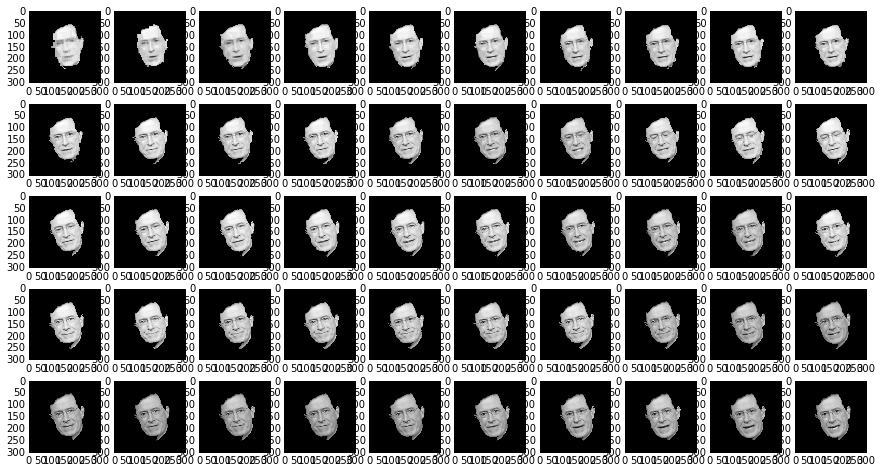

In [40]:
figure(figsize=(15,8))

for i in range(len(window_seq)):
    subplot(5,10,i+1)
    imshow(window_seq[i][-1],cmap='Greys_r')

In [26]:
out.write(full)

error: /Users/yoavfreund/Downloads/opencv-2.4.13/modules/imgproc/src/color.cpp:4421: error: (-215) src.depth() == dst.depth() in function cvCvtColor


In [4]:
from pyspark.ml.clustering import KMeans

In [6]:
my_Kmeans=KMeans()

In [8]:
print my_Kmeans.explainParams()

featuresCol: features column name. (default: features)
initMode: the initialization algorithm. This can be either "random" to choose random points as initial cluster centers, or "k-means||" to use a parallel variant of k-means++ (default: k-means||)
initSteps: steps for k-means initialization mode (default: 5)
k: number of clusters to create (default: 2)
maxIter: max number of iterations (>= 0). (default: 20)
predictionCol: prediction column name. (default: prediction)
seed: random seed. (default: -7649703878154674547)
tol: the convergence tolerance for iterative algorithms. (default: 0.0001)
